# Creating a virtual environment


## Pre-requisites

**NOTE: Some of these are only required for local installation. If you are using Colab, just install the libraries.**

1. Open a project directory called week_1

2. Create a virtual environment

If you are using conda . . .

```bash
conda create --name idp_bootcamp python=3.10
```
If you are using venv . . .

```bash
python3.10 -m venv .venv
```

3. Activate the virtual environment

To activate your conda environment

```bash
conda activate idp_bootcamp
```

To activate your venv environment

```bash
source .venv/bin/activate (in Unix OS)
```

or


```bash
.\.venv\Scripts\activate (in Windows OS)
```


## For Colab

1. Create the following path inside your Googe Drive
idp_bootcamp/week_1/

2. Upload `notebook_week_1.ipynb`, `sri_lanka_electricity_32.,pdf`, `*.ttf` to the week_1 directory you created on your Google Drive

3. Mount your drive by running the code below



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


4. Get the ROOT_PATH, which should look something like this:
```bash
/content/drive/MyDrive/idp_bootcamp/week_1
```


## Package installation


Make sure you have connected your notebook to the correct virtual environment. You can do so by either selecting the correct kernel (in VS Code or a similar IDE) or launching the notebook from an activated environment from the terminal.

Now let's install the required packages. We begin with the library we use to open pdf files.


In [2]:
%pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 83.1 MB/s eta 0:00:00


In [3]:
# check if the installation was successful
import pymupdf


### Additional Libraries for PyMuPDF

**NOTE: Unnecessary for Colab. You may have to do this locally, however.**

When working with PyMuPDF, there are some additional libraries that may be required depending on your operating system.

#### Linux
For Linux users, you may need to install some system dependencies to ensure PyMuPDF works correctly. These dependencies can be installed using the package manager of your distribution. For example, on Ubuntu, you can install the required libraries using the following command:

```bash
sudo apt-get install libmupdf-dev
```

#### Windows
For Windows users, PyMuPDF generally works out of the box with the provided wheels. However, ensure that you have the latest version of Microsoft Visual C++ Redistributable installed, as it may be required for some of the underlying C libraries used by PyMuPDF.

By ensuring these dependencies are met, you can avoid common issues and ensure smooth operation of PyMuPDF on your system.


## Reading a pdf file

Let's now read a pdf file.

In [4]:
import pymupdf
ROOT = "/content/drive/MyDrive/idp_bootcamp/week_1"
pdf = pymupdf.open(ROOT + "/sri_lanka_electricity_32.pdf")

### Questions:
1. How many pages are in the PDF file?
2. What is the height of a page?
3. What is the width of a page?


In [5]:
# To-do: Answer the above questions by calling appropriate methods on the PDF object returned by pymupdf

# 1. How many pages are in the PDF document?
print("Number of pages in the PDF document: ", pdf.page_count)

# 2. What is the height of the first page?
first_page = pdf[0]
print("Height of the first page: ", first_page.mediabox[3])

# 3. What is the width of the first page?
print("Width of the first page: ", first_page.mediabox[2])

Number of pages in the PDF document:  61
Height of the first page:  792.0
Width of the first page:  612.0


### Understanding 'points'

PyMuPDF uses 1 point to represent 1/72 inches.

Can you find out the size of the page in inches?

Assume, an image manipulation software such as PhotoShop uses 100 pixels per inches resolution. If you open this pdf file in your PhotoShop app, what will be the width and height in pixels?


In [6]:
# Select the first page (index 0)
first_page = pdf[0]

# Get the page size in points
page_size = first_page.mediabox_size

# Convert points to inches (1 point = 1/72 inch)
width_in_inches = page_size[0] / 72
height_in_inches = page_size[1] / 72

# Convert inches to pixels at 100 PPI
ppi = 100
width_in_pixels = width_in_inches * ppi
height_in_pixels = height_in_inches * ppi

print(f"Width: {width_in_pixels} pixels, Height: {height_in_pixels} pixels at {ppi} PPI")

Width: 850.0 pixels, Height: 1100.0 pixels at 100 PPI


## Converting to pages to images

Can you save the first page as a .png image?


In [7]:
# Select the first page (index 0)
first_page = pdf.load_page(0)

# Render the page to a pixmap (image object)
pix = first_page.get_pixmap()

# Save the pixmap as a PNG image
pix.save(ROOT + "/first_page.png")

Can you save each page in the pdf file as a .png image?

In [8]:
# Loop through each page in the PDF
for page_num in range(pdf.page_count):
    # Load each page by index
    page = pdf.load_page(page_num)

    # Render the page to a pixmap (image object)
    pix = page.get_pixmap()

    # Save the pixmap as a PNG image
    output_path = f"{ROOT}/page_{page_num + 1}.png"
    pix.save(output_path)

    print(f"Saved page {page_num + 1} as 'page_{page_num + 1}.png'")

# Close the PDF file after processing
pdf.close()

Saved page 1 as 'page_1.png'
Saved page 2 as 'page_2.png'
Saved page 3 as 'page_3.png'
Saved page 4 as 'page_4.png'
Saved page 5 as 'page_5.png'
Saved page 6 as 'page_6.png'
Saved page 7 as 'page_7.png'
Saved page 8 as 'page_8.png'
Saved page 9 as 'page_9.png'
Saved page 10 as 'page_10.png'
Saved page 11 as 'page_11.png'
Saved page 12 as 'page_12.png'
Saved page 13 as 'page_13.png'
Saved page 14 as 'page_14.png'
Saved page 15 as 'page_15.png'
Saved page 16 as 'page_16.png'
Saved page 17 as 'page_17.png'
Saved page 18 as 'page_18.png'
Saved page 19 as 'page_19.png'
Saved page 20 as 'page_20.png'
Saved page 21 as 'page_21.png'
Saved page 22 as 'page_22.png'
Saved page 23 as 'page_23.png'
Saved page 24 as 'page_24.png'
Saved page 25 as 'page_25.png'
Saved page 26 as 'page_26.png'
Saved page 27 as 'page_27.png'
Saved page 28 as 'page_28.png'
Saved page 29 as 'page_29.png'
Saved page 30 as 'page_30.png'
Saved page 31 as 'page_31.png'
Saved page 32 as 'page_32.png'
Saved page 33 as 'page_33.

## Reading text

Can you save the text in the first page as a .txt file?


In [13]:
import fitz  # PyMuPDF

# Specify the PDF file path
ROOT = "/content/drive/MyDrive/idp_bootcamp/week_1"
pdf_path = ROOT + "/sri_lanka_electricity_32.pdf"

# Open the PDF file
pdf = fitz.open(pdf_path)

# Check if the document is encrypted
if pdf.is_encrypted:
    # If encrypted, try opening with a password
    password = input("The PDF is encrypted. Please enter the password: ")

    if not pdf.authenticate(password):
        print("Incorrect password, unable to open the document.")
    else:
        print("PDF decrypted successfully.")
else:
    # Load the first page (index 0)
    first_page = pdf.load_page(0)

    # Extract text from the first page
    text = first_page.get_text()

    # Save the extracted text to a .txt file
    with open(ROOT + "/first_page.txt", "w", encoding="utf-8") as text_file:
        text_file.write(text)

    print("First page text saved as 'first_page.txt'")

# Close the PDF file after processing
pdf.close()

First page text saved as 'first_page.txt'


Do you know why the .txt file is empty?

## Reading text with OCR

Let's see if we can use OCR to extract the text.

We will be using PaddleOCR for this purpose.

Let's start by installing the libraries.

In [14]:
%pip install paddlepaddle
%pip install "paddleocr>=2.6.0.3"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=7d6282751e9f931984225f27daf4e6b408515c33b4f3b1a55a3bc984a006ddb7
  Stored in d

In [15]:
from paddleocr import PaddleOCR,draw_ocr


In [16]:
ocr = PaddleOCR(use_angle_cls=True, lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:17<00:00, 224kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:29<00:00, 349kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:14<00:00, 151kiB/s]

[2024/09/28 10:37:07] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [18]:
# Specify the PDF file path and root directory
ROOT = "/content/drive/MyDrive/idp_bootcamp/week_1"
pdf_path = ROOT + "/sri_lanka_electricity_32.pdf"

# Open the PDF file
pdf = fitz.open(pdf_path)

# Loop through each page in the PDF
for page_num in range(pdf.page_count):
    # Load each page by index
    page = pdf.load_page(page_num)

    # Extract images on the page
    page_images = page.get_images(full=True)

    for i, img in enumerate(page_images, start=1):
        xref = img[0]  # Image reference

        # Get the pixmap (image)
        pix = fitz.Pixmap(pdf, xref)

        # If image has more than 3 color channels, convert it to RGB
        if pix.n - pix.alpha > 3:
            pix = fitz.Pixmap(fitz.csRGB, pix)

        # Save the image to a PNG file
        img_path = f"{ROOT}/page_{page_num+1}_img_{i}.png"
        pix.save(img_path)
        pix = None  # Free the Pixmap

        # Perform OCR on the saved image
        ocr_result = ocr.ocr(img_path)

        # Optional: Print OCR results for each image
        for result in ocr_result:
            print(f"OCR result for image {i} on page {page_num+1}: {result}")

        # You can also draw the OCR results on the image and save it
        # Uncomment the lines below to draw and save OCR results as images
        # image = Image.open(img_path)
        # boxes = [line[0] for line in ocr_result]
        # txts = [line[1][0] for line in ocr_result]
        # scores = [line[1][1] for line in ocr_result]
        # im_show = draw_ocr(image, boxes, txts, scores, font_path='path_to_font')
        # im_show = Image.fromarray(im_show)
        # im_show.save(f"{ROOT}/ocr_result_page_{page_num+1}_img_{i}.png")

print("Images saved and OCR processed for each page.")

# Close the PDF file after processing
pdf.close()

[2024/09/28 10:43:55] ppocr DEBUG: dt_boxes num : 41, elapsed : 0.6836891174316406
[2024/09/28 10:43:55] ppocr DEBUG: cls num  : 41, elapsed : 0.14742231369018555
[2024/09/28 10:44:04] ppocr DEBUG: rec_res num  : 41, elapsed : 8.993161916732788
OCR result for image 1 on page 1: [[[[434.0, 374.0], [2194.0, 423.0], [2192.0, 478.0], [433.0, 429.0]], ('IN THE SUPREME COURT OF THE DEMOCRATIC SOCIALiST`REPUBLIC OF SRILANKA', 0.7213278412818909)], [[[982.0, 580.0], [1622.0, 599.0], [1620.0, 654.0], [980.0, 636.0]], ('"SRI LANKA ELECTRICITY BILL"E', 0.835706353187561)], [[[365.0, 797.0], [801.0, 808.0], [799.0, 863.0], [363.0, 852.0]], ('SC (SD) No. 42/2024', 0.967049777507782)], [[[905.0, 818.0], [1168.0, 825.0], [1167.0, 874.0], [904.0, 866.0]], ('Petitioners:', 0.9998986124992371)], [[[1247.0, 828.0], [1355.0, 828.0], [1355.0, 877.0], [1247.0, 877.0]], ('1.', 0.9985427856445312)], [[[1331.0, 828.0], [2218.0, 853.0], [2216.0, 901.0], [1330.0, 876.0]], ("Ceylon Electricity Board Engineers' Un

In [19]:
from PIL import Image

image_path = ROOT + "/page_1.png"

ocr_result = ocr.ocr(image_path, cls=True)

for idx in range(len(ocr_result)):
    res = ocr_result[idx]
    for line in res:
        print(line)

[2024/09/28 10:52:15] ppocr DEBUG: dt_boxes num : 39, elapsed : 0.6122643947601318
[2024/09/28 10:52:16] ppocr DEBUG: cls num  : 39, elapsed : 0.2890455722808838
[2024/09/28 10:52:21] ppocr DEBUG: rec_res num  : 39, elapsed : 5.6979241371154785
[[[103.0, 90.0], [527.0, 101.0], [526.0, 115.0], [103.0, 104.0]], ("IN THE SUPREME COURT OF THE DEMOCRATIC SOCIALIST'REPUBLIC OF SRILANKA", 0.9498631358146667)]
[[[234.0, 138.0], [389.0, 144.0], [388.0, 158.0], [233.0, 152.0]], ('"SRI LANKA ELECTRICITY BILL"', 0.9258561134338379)]
[[[86.0, 191.0], [193.0, 194.0], [193.0, 208.0], [85.0, 205.0]], ('SC (SD)No.42/2024', 0.9192470908164978)]
[[[215.0, 195.0], [281.0, 198.0], [280.0, 211.0], [214.0, 208.0]], ('Petitioners:', 0.9922648072242737)]
[[[298.0, 198.0], [532.0, 204.0], [531.0, 218.0], [298.0, 212.0]], ('1.Ceylon Electricity Board Engineers Union', 0.9890400767326355)]
[[[316.0, 227.0], [467.0, 231.0], [467.0, 245.0], [316.0, 240.0]], ('Dhanushka Parakramasinghe', 0.9997473359107971)]
[[[295.

In [29]:
# draw result
result = ocr_result[0]
image = Image.open(image_path).convert('RGB')

boxes = [elements[0] for elements in result]
txts = [elements[1][0] for elements in result]
scores = [elements[1][1] for elements in result]

im_show = draw_ocr(image, boxes, txts, scores, font_path=ROOT + '/Ubuntu-L.ttf')
im_show = Image.fromarray(im_show)
im_show.save(ROOT + "/annotation.png")



## Understanding page structure

## Layout analysis with paddleocr

Let's now try to identify if the page contains paragraphs or tables or any other unique structure

In [32]:
%pip install layoutparser
%pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
ERROR: Could not find a version that satisfies the requirement detectron2 (from versions: none)
ERROR: No matching distribution found for detectron2


[2024/09/28 11:19:20] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

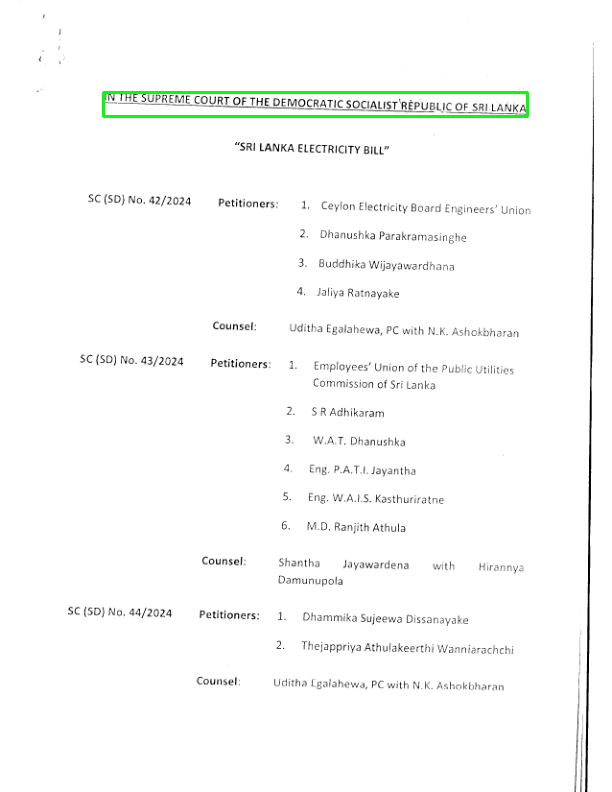

[2024/09/28 11:19:22] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.1419827938079834
[2024/09/28 11:19:22] ppocr DEBUG: cls num  : 1, elapsed : 0.040918588638305664
[2024/09/28 11:19:22] ppocr DEBUG: rec_res num  : 1, elapsed : 0.2595043182373047
Detected text: JPREME COURT OF THE DEMOCRATIC SOCIALIST'REPUBLIC OF SRILANKA, Confidence: 0.947769284248352


True

In [37]:
import cv2
import numpy as np
from paddleocr import PaddleOCR
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab

# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Load the image
image_path = ROOT + "/page_1.png"
image = cv2.imread(image_path)

# Step 1: Preprocess the image
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve line detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use adaptive thresholding to binarize the image
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Step 2: Detect contours (potential paragraph or table areas)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to draw contours for visualization
contour_image = image.copy()

# Step 3: Filter contours and classify regions
detected_regions = []
for contour in contours:
    # Get the bounding box for each contour
    x, y, w, h = cv2.boundingRect(contour)

    # Filter out small areas that are unlikely to be tables or text blocks
    if w < 50 or h < 20:
        continue

    # Draw the bounding box on the image
    cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Save the detected region for OCR
    detected_regions.append((x, y, w, h))

# Display the contour image with bounding boxes
cv2_imshow(contour_image)  # Use cv2_imshow instead of cv2.imshow()

# Step 4: Extract text from each detected region
for (x, y, w, h) in detected_regions:
    # Crop the region from the original image
    region = image[y:y + h, x:x + w]

    # Perform OCR directly on the NumPy array
    ocr_result = ocr.ocr(region, cls=True)

    # Print the recognized text for each block
    for res in ocr_result:
        for line in res:
            text = line[1][0]  # Extracted text
            confidence = line[1][1]  # Confidence score
            print(f"Detected text: {text}, Confidence: {confidence}")

# Optionally save the contour image with detected regions
cv2.imwrite(ROOT + "/detected_layout.png", contour_image)


### Table extraction with paddleocr

Let's extract a table from a page with paddleocr



[2024/09/28 11:20:42] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

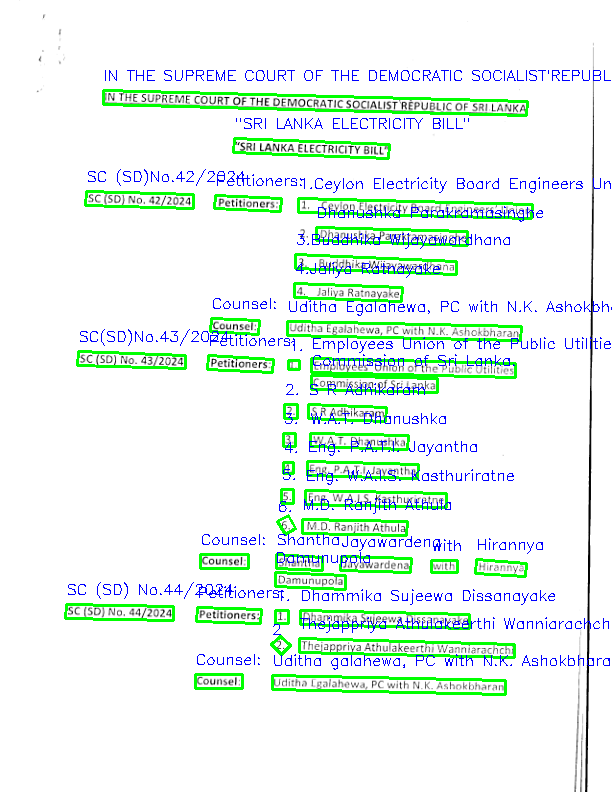

True

In [38]:
import cv2
import numpy as np
from paddleocr import PaddleOCR
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab

# Initialize PaddleOCR for table detection
ocr = PaddleOCR(use_angle_cls=True, lang='en', rec=True, det=True)

# Load the image
image_path = ROOT + "/page_1.png"
image = cv2.imread(image_path)

# Step 1: Preprocess the image
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve line detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use adaptive thresholding to binarize the image
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Step 2: Detect tables using PaddleOCR
ocr_result = ocr.ocr(image_path, cls=True)

# Prepare a list to store detected table content
table_data = []

# Step 3: Filter results for table structures
for line in ocr_result:
    for word_info in line:
        # Extract bounding box and text
        box = word_info[0]  # The coordinates of the detected text
        text = word_info[1][0]  # The recognized text
        confidence = word_info[1][1]  # Confidence score

        # Optionally, filter by confidence or area to focus on tables
        if confidence > 0.5:  # You can adjust this threshold
            # Append to table data
            table_data.append((box, text, confidence))

# Print detected table content
for entry in table_data:
    box, text, confidence = entry
    print(f"Detected text: {text}, Confidence: {confidence}, Box: {box}")

# Optionally visualize the results
for entry in table_data:
    box, text, _ = entry
    # Draw the bounding box around detected text
    cv2.polylines(image, [np.int32(box)], isClosed=True, color=(0, 255, 0), thickness=2)
    # You can also put the detected text on the image
    cv2.putText(image, text, (int(box[0][0]), int(box[0][1] - 10)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Display the image with detected tables
cv2_imshow(image)  # Use cv2_imshow for displaying in Colab

# Optionally save the image with detected tables
cv2.imwrite(ROOT + "/detected_tables.png", image)


## Output formatting with paddleocr

[2024/09/28 11:21:37] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

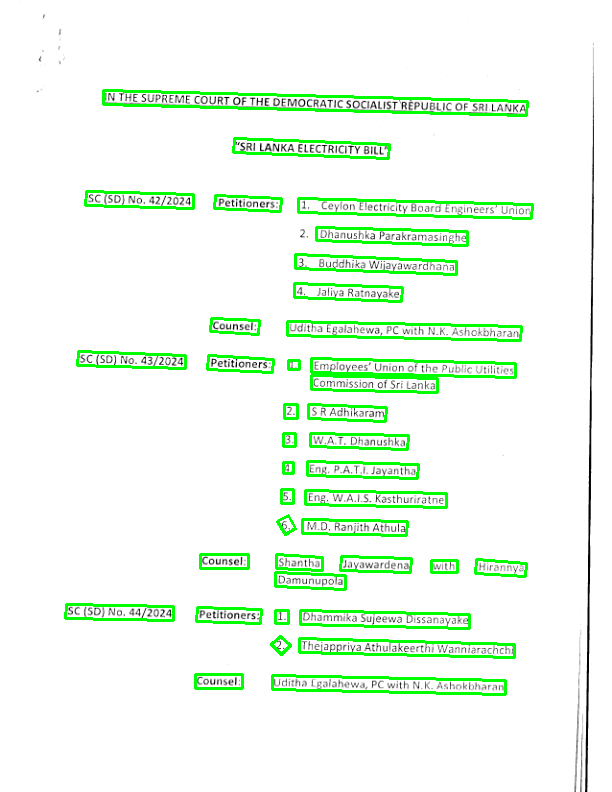

In [39]:
import cv2
import numpy as np
import pandas as pd  # To create dataframes for tables
from paddleocr import PaddleOCR
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en', rec=True, det=True)

# Load the image
image_path = ROOT + "/page_1.png"
image = cv2.imread(image_path)

# Step 1: Perform OCR
ocr_result = ocr.ocr(image_path, cls=True)

# Prepare a list to store detected table content
table_data = []

# Step 2: Organize data into rows and columns
for line in ocr_result:
    row = []
    for word_info in line:
        text = word_info[1][0]  # The recognized text
        confidence = word_info[1][1]  # Confidence score
        row.append((text, confidence))

    if row:
        table_data.append(row)

# Step 3: Convert to DataFrame for better formatting
df = pd.DataFrame(table_data)

# Display the formatted DataFrame
print("Extracted Table Data:")
print(df)

# Optionally save the DataFrame to a CSV file
df.to_csv(ROOT + "/extracted_table_data.csv", index=False)

# Optionally visualize the results (draw bounding boxes)
for line in ocr_result:
    for word_info in line:
        box = word_info[0]  # The coordinates of the detected text
        text = word_info[1][0]  # The recognized text
        cv2.polylines(image, [np.int32(box)], isClosed=True, color=(0, 255, 0), thickness=2)

# Display the image with detected tables
cv2_imshow(image)  # Use cv2_imshow for displaying in Colab
